In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

https://www.youtube.com/watch?v=w8yWXqWQYmU&t=817s

# Data - MNIST

X是m行*784列的矩阵，784代表将28*28的二维图像拉伸成一维，每行代表一张图片。在实际运算中使用的是X转置XT，每一列代表一张图片的784个像素.

![img1](https://github.com/stemgene/deep-learning-for-image-process/blob/main/Create-a-neural-network-from-scratch/image/inputx.png?raw=true)

Therefore the input matrix of X ~ [784, m]

In [2]:
data = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
data.shape

(42000, 785)

# Network Structure

Input = 784,

Hidden layer = 一层，10个neuron

output = 10

![structure](https://github.com/stemgene/deep-learning-for-image-process/blob/main/Create-a-neural-network-from-scratch/image/structure.png?raw=true)

# Formula

## Forward Propagation

Input Layer: A0 = X ~ [784, m]

Hidden Layer: Z1 ~ [10, m] = w1 * A0 + b1, w1 ~ [10, 784], b1 ~ [10, 1]

            A1 = g(Z1) = ReLu(Z1)

Output Layer: Z2 ~ [10, m] = w2 * A1 + b2, w2 ~ [10, 10], b2 ~ [10, 1]

            A2 = softmax(Z2)
            
![softmax](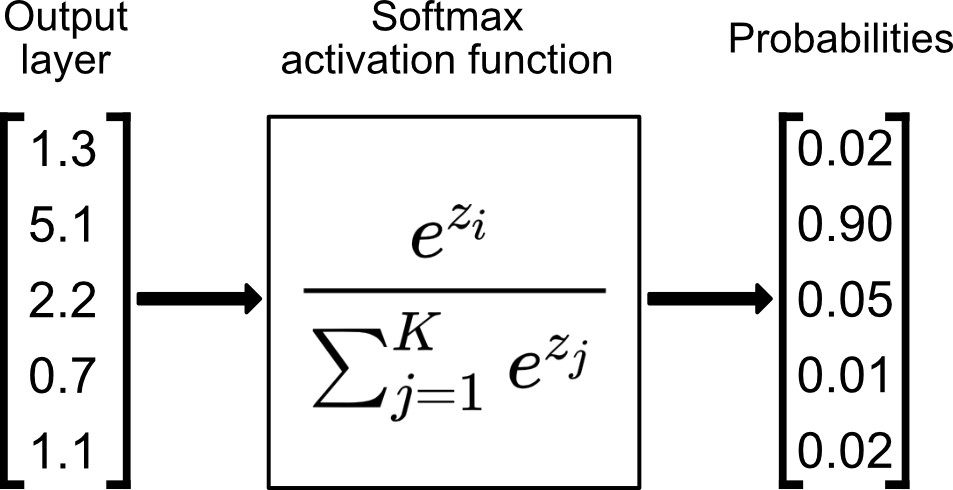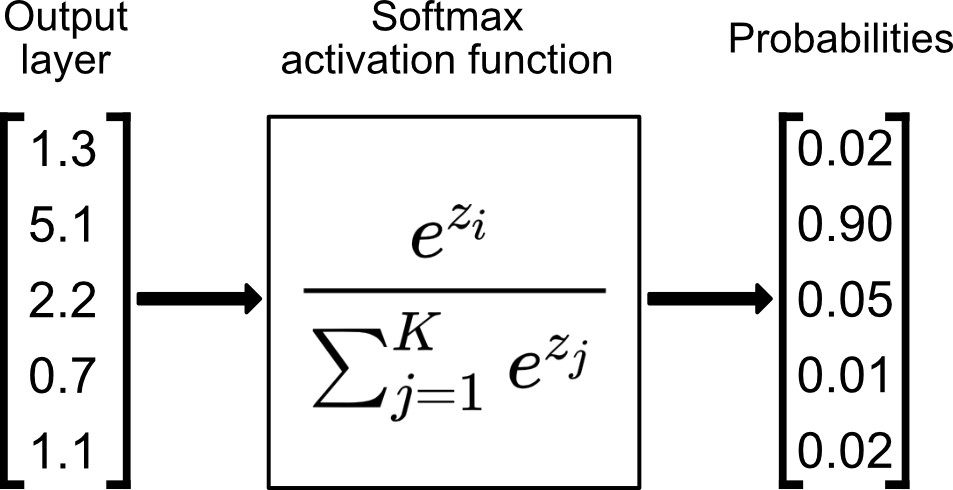)

## Backward Propagation

Output Layer: dZ2 ~ [10, m] = A2 - Y, A2 ~ [10, m], Y ~ [10, m]. 注意A2的每一列都是propability，而不是像Y那样对于预测的值给1而其余的都是0. 需要用np.argmax(A2, 0)进行0-1化。另外作者并没有使用cross entropy等求loss的算法，而是直接做减法

            dw2 ~ [10, 10] = 1/m * dZ2 * A1^T, A1^T ~ [m, 10]
            
            db2 ~ [10, 1]= 1/ m * sum(dZ2)
        
Hidden Layer: dZ1 ~ [10, m] = w2^T * dZ2 .* g'(Z1), w2^T ~ [10, 10], g'(Z1) ~ [10, m]

            dw1 ~ [10, 784] = 1/m * dZ1 * X^T, X^T ~ [m, 784]
            
            db1 = 1/m * sum(dZ1)

## Update the parameters

w1 := w1 - alpha * dw1

b1 := b1 - alpha * db1

w2 := w2 - alpha * dw2

b2 := b2 - alpha * db2

Our NN will have a simple two-layer architecture. Input layer $a^{[0]}$ will have 784 units corresponding to the 784 pixels in each 28x28 input image. A hidden layer $a^{[1]}$ will have 10 units with ReLU activation, and finally our output layer $a^{[2]}$ will have 10 units corresponding to the ten digit classes with softmax activation.

**Forward propagation**

$$Z^{[1]} = W^{[1]} X + b^{[1]}$$
$$A^{[1]} = g_{\text{ReLU}}(Z^{[1]}))$$
$$Z^{[2]} = W^{[2]} A^{[1]} + b^{[2]}$$
$$A^{[2]} = g_{\text{softmax}}(Z^{[2]})$$

**Backward propagation**

$$dZ^{[2]} = A^{[2]} - Y$$
$$dW^{[2]} = \frac{1}{m} dZ^{[2]} A^{[1]T}$$
$$dB^{[2]} = \frac{1}{m} \Sigma {dZ^{[2]}}$$
$$dZ^{[1]} = W^{[2]T} dZ^{[2]} .* g^{[1]\prime} (z^{[1]})$$
$$dW^{[1]} = \frac{1}{m} dZ^{[1]} A^{[0]T}$$
$$dB^{[1]} = \frac{1}{m} \Sigma {dZ^{[1]}}$$

**Parameter updates**

$$W^{[2]} := W^{[2]} - \alpha dW^{[2]}$$
$$b^{[2]} := b^{[2]} - \alpha db^{[2]}$$
$$W^{[1]} := W^{[1]} - \alpha dW^{[1]}$$
$$b^{[1]} := b^{[1]} - \alpha db^{[1]}$$

**Vars and shapes**

Forward prop

- $A^{[0]} = X$: 784 x m
- $Z^{[1]} \sim A^{[1]}$: 10 x m
- $W^{[1]}$: 10 x 784 (as $W^{[1]} A^{[0]} \sim Z^{[1]}$)
- $B^{[1]}$: 10 x 1
- $Z^{[2]} \sim A^{[2]}$: 10 x m
- $W^{[1]}$: 10 x 10 (as $W^{[2]} A^{[1]} \sim Z^{[2]}$)
- $B^{[2]}$: 10 x 1

Backprop

- $dZ^{[2]}$: 10 x m ($~A^{[2]}$)
- $dW^{[2]}$: 10 x 10
- $dB^{[2]}$: 10 x 1
- $dZ^{[1]}$: 10 x m ($~A^{[1]}$)
- $dW^{[1]}$: 10 x 10
- $dB^{[1]}$: 10 x 1

In [4]:
data = np.array(data)
m, n = data.shape  #(42000, 785)
np.random.shuffle(data)

data_dev = data[0:1000].T  #(785, 1000)
Y_dev = data_dev[0]
X_dev = data_dev[1: n] #(784, 1000)
X_dev = X_dev / 255

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1: n]
X_train = X_train / 255

Y_train

array([3, 2, 5, ..., 0, 1, 4])

In [5]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5  # or use np.random.randn(10, 784) no need to -0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(0, Z)

def softmax(Z):
    return np.exp(Z) / sum(np.exp(Z))

def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    
    return Z1, A1, Z2, A2

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    return one_hot_Y.T

def deriv_ReLU(Z):
    return Z > 0

def back_prop(Z1, A1, Z2, A2, W2, X, Y):
    m = Y.size
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y # (10, 41000)
    dW2 = 1 / m * dZ2.dot(A1.T) #(10, 10)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * deriv_ReLU(Z1) #(10, 41000)
    dW1 = 1 / m * dZ1.dot(X.T) # (10, 784)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW2, db2, dW1, db1, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2
    

In [6]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, iterations, alpha):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = back_prop(Z1, A1, Z2, A2, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW2, db2, dW1, db1, alpha)
        if i % 20 == 0:
            print("Iteration: ", i)
            print("Accuracy: ", get_accuracy(get_predictions(A2), Y))
    return W1, b1, W2, b2

def only_one_epoch(X, Y, alpha):
    W1, b1, W2, b2 = init_params() #(10, 784) (10, 1) (10, 10) (10, 1)
    Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X) # (10, 41000) (10, 41000) (10, 41000) (10, 41000)
    dW1, db1, dW2, db2 = back_prop(Z1, A1, Z2, A2, W2, X, Y)
    print(dW1.shape, db1.shape, dW2.shape, db2.shape)
    W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW2, db2, dW1, db1, alpha)
    return W1, b1, W2, b2

In [7]:
#W1, b1, W2, b2 = only_one_epoch(X_train, Y_train, 0.1)

In [8]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 500, 0.1)

Iteration:  0
[7 6 7 ... 7 7 7] [3 2 5 ... 0 1 4]
Accuracy:  0.08009756097560976
Iteration:  20
[4 6 1 ... 6 1 4] [3 2 5 ... 0 1 4]
Accuracy:  0.3013658536585366
Iteration:  40
[3 2 1 ... 6 1 4] [3 2 5 ... 0 1 4]
Accuracy:  0.43658536585365854
Iteration:  60
[3 2 1 ... 6 1 4] [3 2 5 ... 0 1 4]
Accuracy:  0.5422682926829269
Iteration:  80
[3 2 1 ... 6 1 4] [3 2 5 ... 0 1 4]
Accuracy:  0.6174146341463415
Iteration:  100
[3 2 1 ... 6 1 4] [3 2 5 ... 0 1 4]
Accuracy:  0.6679756097560976
Iteration:  120
[3 2 5 ... 6 1 4] [3 2 5 ... 0 1 4]
Accuracy:  0.7012195121951219
Iteration:  140
[3 2 5 ... 6 1 4] [3 2 5 ... 0 1 4]
Accuracy:  0.7266829268292683
Iteration:  160
[3 2 5 ... 6 1 4] [3 2 5 ... 0 1 4]
Accuracy:  0.7451951219512195
Iteration:  180
[3 2 5 ... 6 1 4] [3 2 5 ... 0 1 4]
Accuracy:  0.7617804878048781
Iteration:  200
[3 2 5 ... 6 1 4] [3 2 5 ... 0 1 4]
Accuracy:  0.7752682926829269
Iteration:  220
[3 2 5 ... 6 1 4] [3 2 5 ... 0 1 4]
Accuracy:  0.7856341463414634
Iteration:  240
[3 2

In [9]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [3]
Label:  3


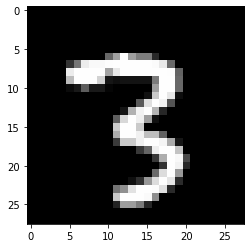

Prediction:  [2]
Label:  2


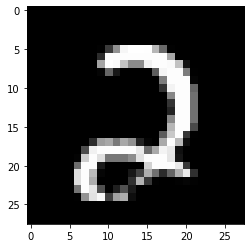

Prediction:  [5]
Label:  5


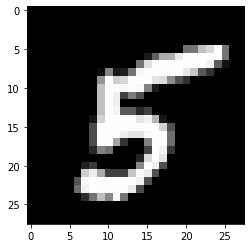

Prediction:  [8]
Label:  8


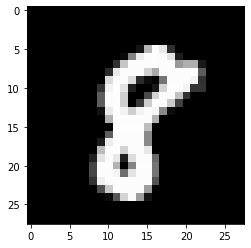

In [10]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

In [11]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[5 4 7 7 4 3 0 7 8 6 7 0 4 8 0 6 0 1 9 1 8 1 9 1 0 9 7 3 9 2 0 1 2 5 4 5 9
 2 3 0 6 3 4 3 1 8 7 2 6 0 4 4 4 2 4 1 7 4 0 7 4 1 6 0 0 0 0 4 5 7 9 9 8 1
 5 2 4 8 1 2 7 5 4 3 0 1 6 9 3 3 7 0 0 5 1 6 0 5 7 9 6 9 5 1 9 6 5 7 2 3 8
 8 1 6 7 0 3 1 9 9 7 6 0 5 7 3 1 3 4 6 3 5 5 0 9 0 8 8 9 3 6 7 8 0 0 0 4 7
 6 6 2 4 9 8 5 8 7 1 2 5 5 9 9 3 8 5 1 9 5 8 6 9 2 4 2 9 8 6 6 1 9 4 3 5 9
 3 7 1 4 8 8 9 4 6 1 4 4 9 7 1 1 9 4 9 0 9 1 1 2 7 6 0 4 2 1 3 3 7 2 6 2 5
 2 0 1 2 7 7 2 3 3 3 3 4 7 9 3 7 1 5 0 9 0 9 4 6 5 0 9 9 6 2 8 5 8 4 9 2 1
 0 4 8 6 4 1 2 4 1 5 3 0 1 2 4 1 9 2 5 7 0 1 0 2 7 1 1 6 1 9 7 1 1 2 6 5 8
 5 8 1 1 4 9 0 5 8 2 7 5 5 4 8 6 6 1 7 8 9 6 1 7 7 2 3 9 1 2 3 1 9 1 7 1 0
 9 0 1 0 0 5 4 1 7 2 8 3 9 6 3 1 2 0 9 4 2 7 1 5 3 3 5 4 8 9 6 2 7 8 3 8 8
 9 4 8 9 2 5 7 3 9 1 3 4 9 0 8 4 6 3 5 2 4 8 5 6 4 5 8 0 1 9 2 5 9 4 6 3 3
 1 7 3 5 4 3 6 4 8 3 3 2 6 1 2 8 8 1 2 4 9 5 1 2 4 1 6 2 5 5 4 5 4 8 0 2 0
 5 2 3 4 7 3 0 3 5 1 2 0 7 4 7 1 1 6 1 6 8 7 4 9 0 4 8 7 9 5 4 9 6 6 4 9 8
 2 6 6 6 8 6 3 0 2 2 7 3 

0.85